In [0]:
with open('diary.txt', 'r') as file:
    data = file.read()

In [44]:
diary_list=data.split('\n--\n')
diary_list

['My birthday party\nDALIY DIARY\n2020/01/03 wed\n++\nDear diary.\nToday was my birthday. I invited all of my friends to my party.\nI had such a fun times, but because of the corona virus we all had to wear mask. :<\nMy friends gave me mask for presents.\nThey are soo sweet!',
 "HCI team meeting\xa0\nDALIY DIARY\n2020/06/03\xa0wed\n++\nDear diary.\nToday I I met my teammates for the first time!\xa0because of the corona virus, we\xa0weren't able to meet person to person.:<\xa0\xa0\nWe are making some website for the\xa0HCI team project.\nIt's not a easy job, but I'm sure it's gonna be a good experience!!!\xa0\n\xa0let's stay Safe and work hard\xa0",
 "Daily blog\xa0#01\u200b\nDALIY DIARY\n2020/01/03 wed\n++\nDear diary.\nToday I did some cleaning. I love cleaning\xa0\nCleaning your room can feel like an overwhelming task, but it is likely a quicker and easier process than you imagine! Play music, write a list, give yourself rewards, and make it into a game to keep yourself motivated.\nl

In [0]:
class Diary:
  def __init__(self,title,category,date,content):
    self.date=title
    self.category=category
    self.date=date
    self.content=content

In [0]:
diary_preprocessed=[]
for diary in diary_list:
  diary=diary.replace('\u200b','')
  diary=diary.replace('\xa0','')

  meta,content=diary.split("\n++\n")
  title,category,date=meta.split('\n')

  date=date.lower()
  content=content.lower()
  for char in '-.,\n<>:()!?':
    content=content.replace(char,' ')

  diary_preprocessed.append([title,category,date,content])

In [60]:
diary_preprocessed

[['My birthday party',
  'DALIY DIARY',
  '2020/01/03 wed',
  'dear diary  today was my birthday  i invited all of my friends to my party  i had such a fun times  but because of the corona virus we all had to wear mask     my friends gave me mask for presents  they are soo sweet '],
 ['HCI team meeting',
  'DALIY DIARY',
  '2020/06/03wed',
  "dear diary  today i i met my teammates for the first time because of the corona virus  weweren't able to meet person to person    we are making some website for thehci team project  it's not a easy job  but i'm sure it's gonna be a good experience    let's stay safe and work hard"],
 ['Daily blog#01',
  'DALIY DIARY',
  '2020/01/03 wed',
  "dear diary  today i did some cleaning  i love cleaning cleaning your room can feel like an overwhelming task  but it is likely a quicker and easier process than you imagine  play music  write a list  give yourself rewards  and make it into a game to keep yourself motivated  let's stay clean"],
 ['Workout routin

In [0]:
# 제목별 빈도 분석
words_by_title={}
count_by_title={}
for title,_,_,content in diary_preprocessed:
  words_by_title[title]=[word for word in content.split(" ") if len(word)>0]

  word_list=words_by_title[title]
  d = {};
  for word in word_list:
    d[word] = d.get(word, 0) + 1
  count_by_title[title]=sorted(d.items(), key = lambda x: x[1], reverse = True)

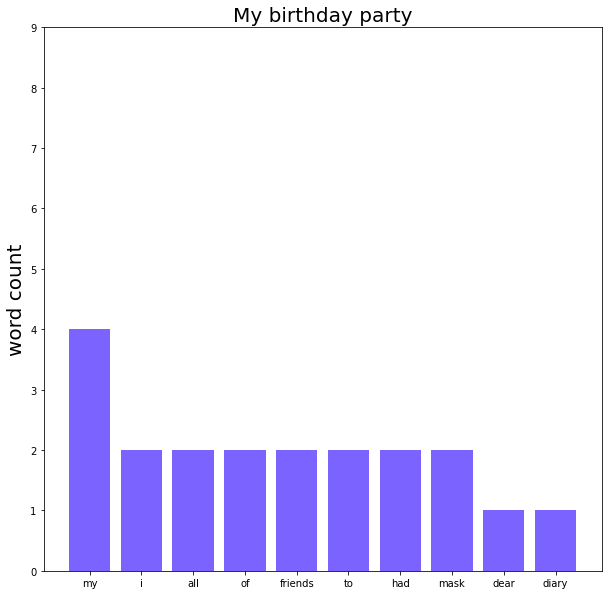

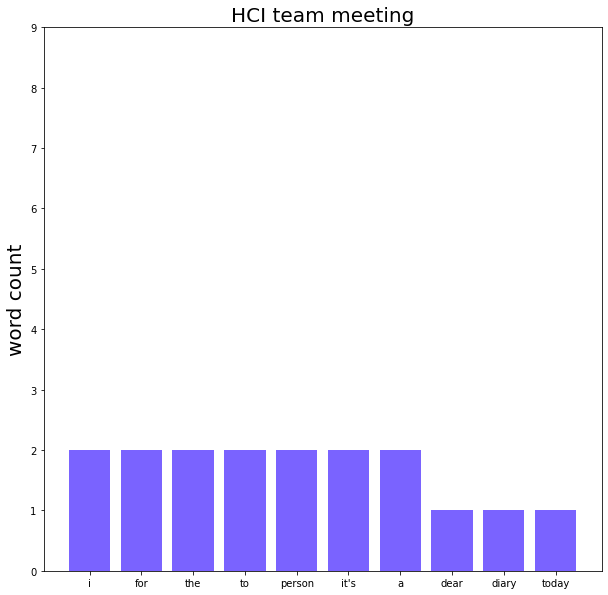

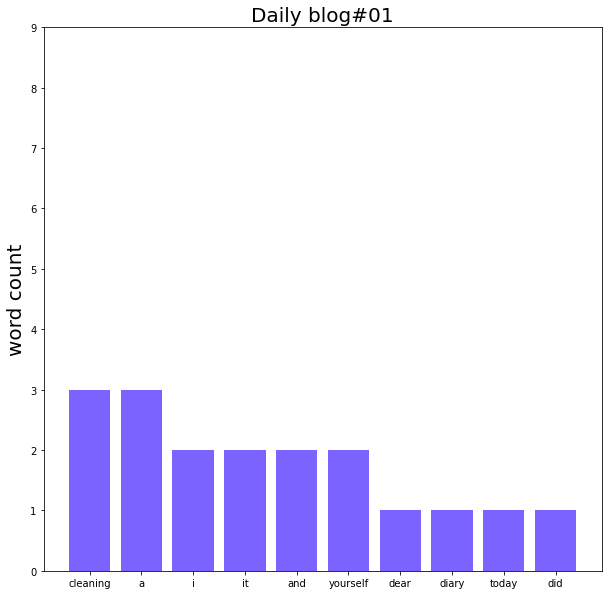

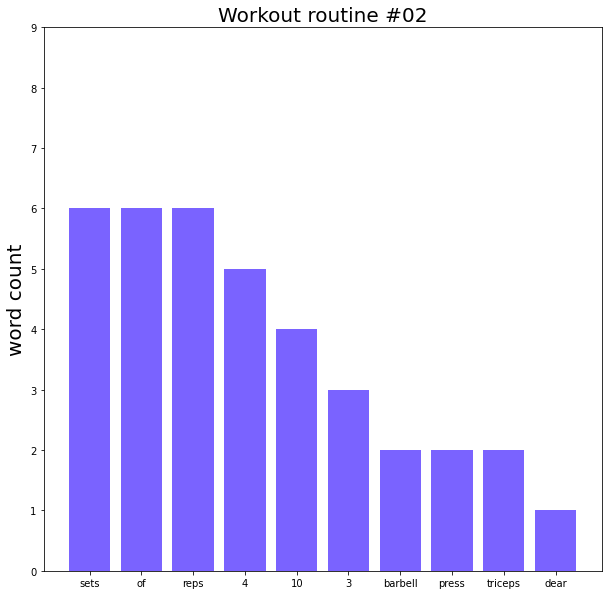

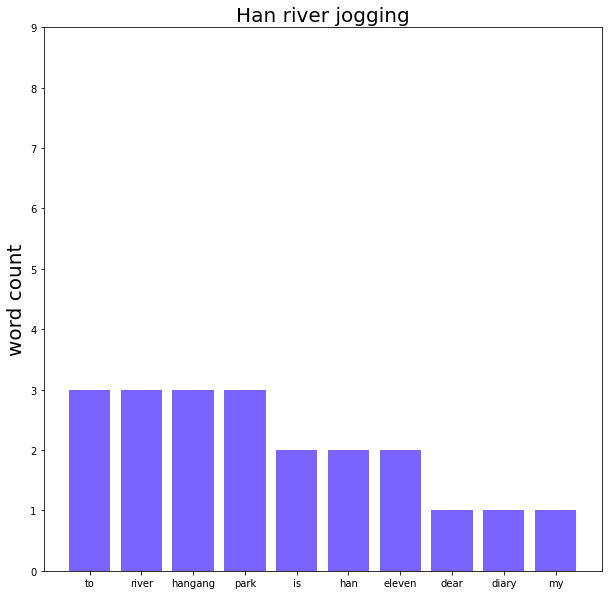

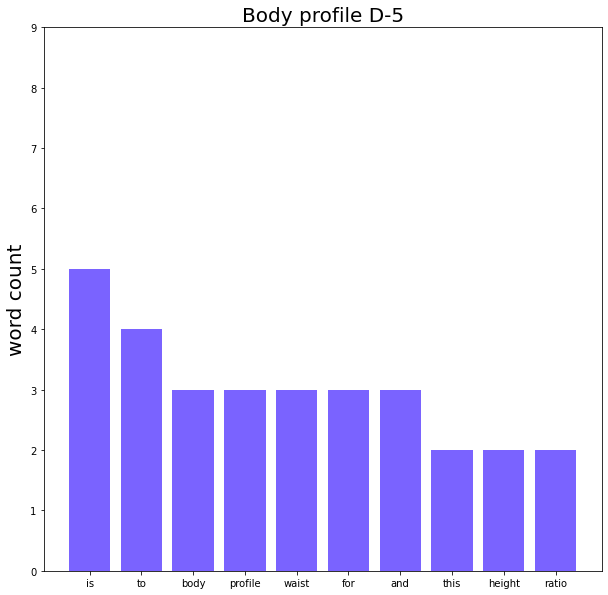

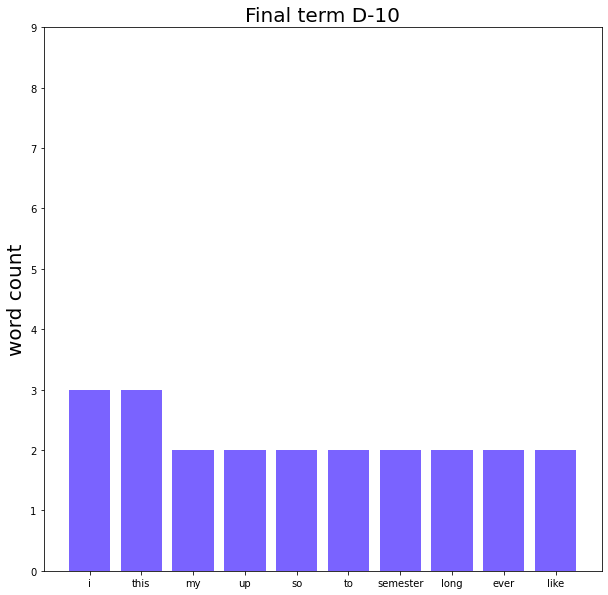

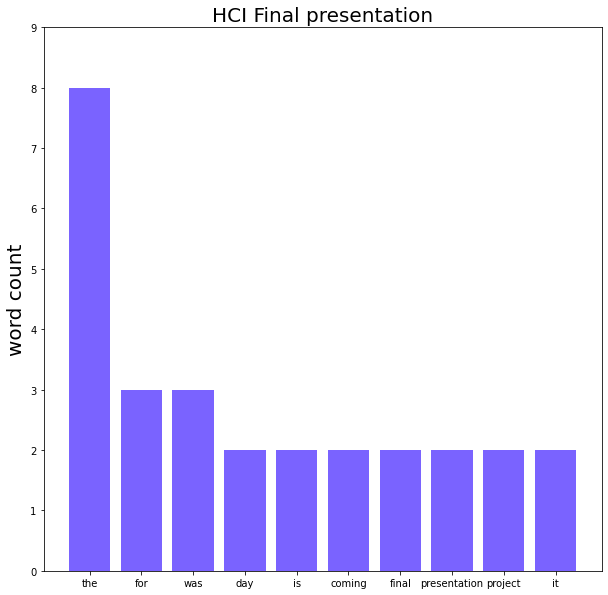

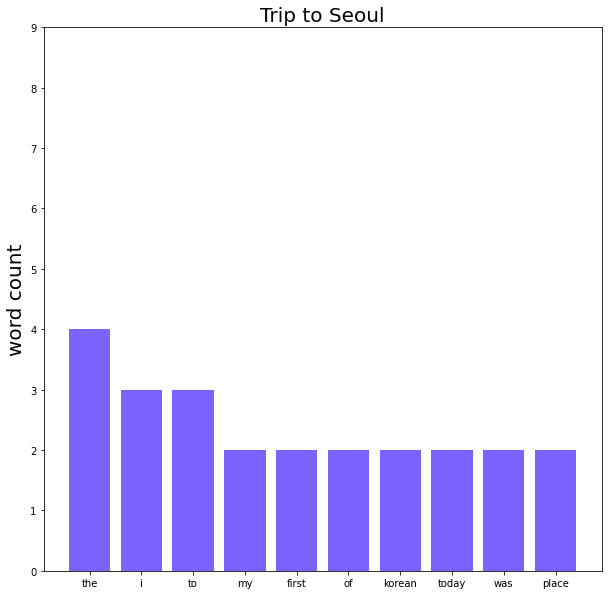

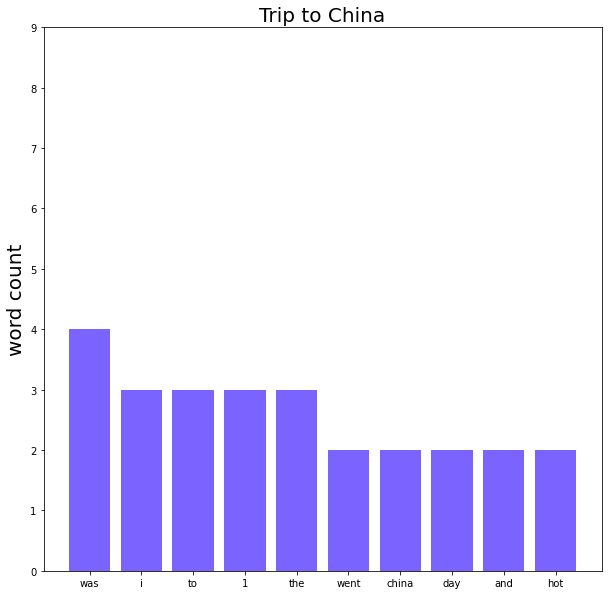

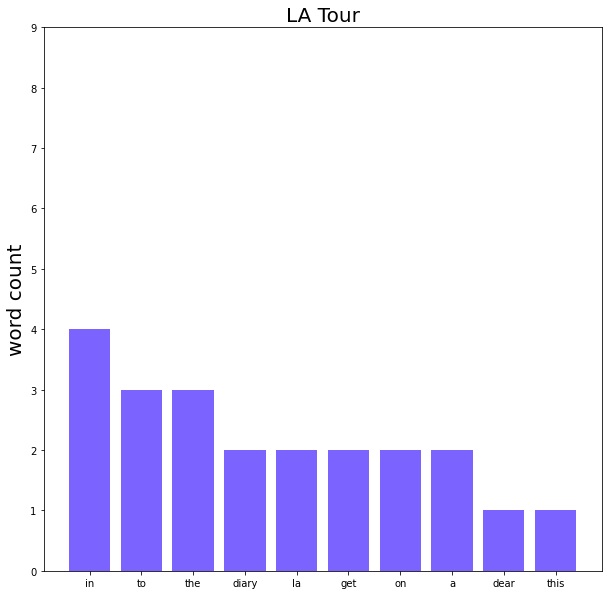

In [166]:
from matplotlib import pyplot as plt

for title,wordcount in count_by_title.items():
  plt.figure(figsize=(10,10))
  frequent=wordcount[:10]
  #print(wordcount)
  word,count = zip(*frequent)
  #print(word,count)

  x_pos = np.arange(len(word))
 
  plt.bar(x_pos,count,align='center',color='#7A63FF')
  plt.xticks(x_pos, word) 
  plt.yticks(list(range(10)))
  plt.ylabel('word count',fontsize=20)
  plt.title(title,fontsize=20)
  plt.savefig('results/'+title+'.png')
  plt.show()

In [148]:
# 카테고리별 빈도 분석
words_by_category={}
count_by_category={}
for _,category,_,content in diary_preprocessed:
  if category in words_by_category.keys():
    words_by_category[category].extend([word for word in content.split(" ") if len(word)>0])
  else:
    words_by_category[category]=[word for word in content.split(" ") if len(word)>0]

  
  word_list=words_by_category[category]
  d = {};
  for word in word_list:
    d[word] = d.get(word, 0) + 1
  count_by_category[category]=sorted(d.items(), key = lambda x: x[1], reverse = True)
print(words_by_category.keys())
print(count_by_category.keys())

dict_keys(['DALIY DIARY', 'WORKOUT', 'STUDY PLANS', 'TRAVEL'])
dict_keys(['DALIY DIARY', 'WORKOUT', 'STUDY PLANS', 'TRAVEL'])


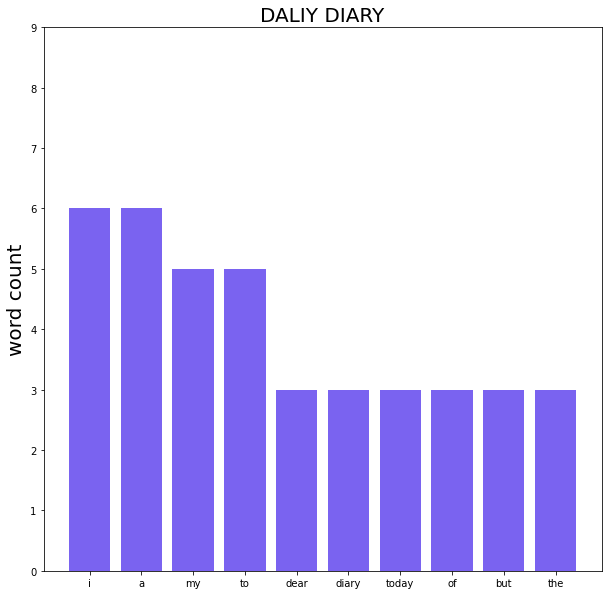

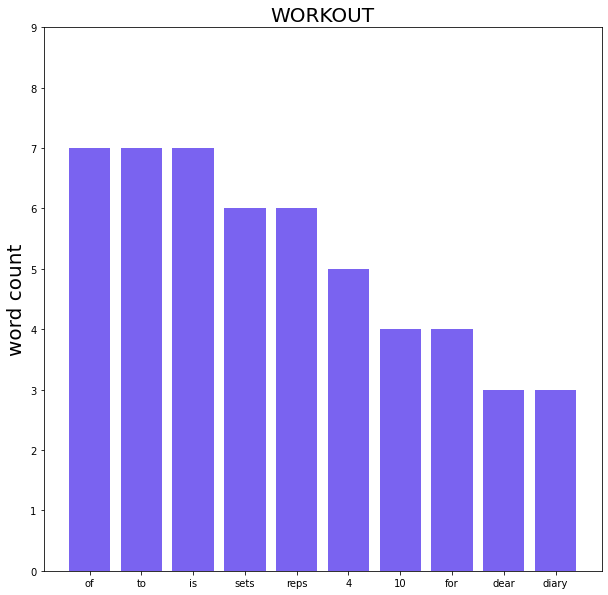

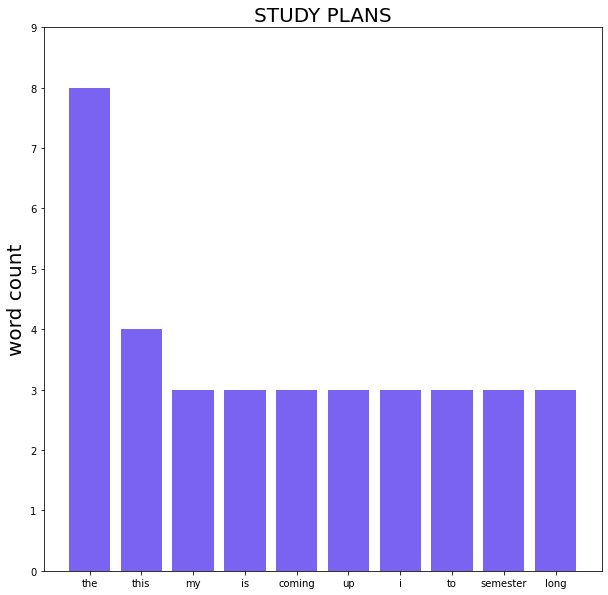

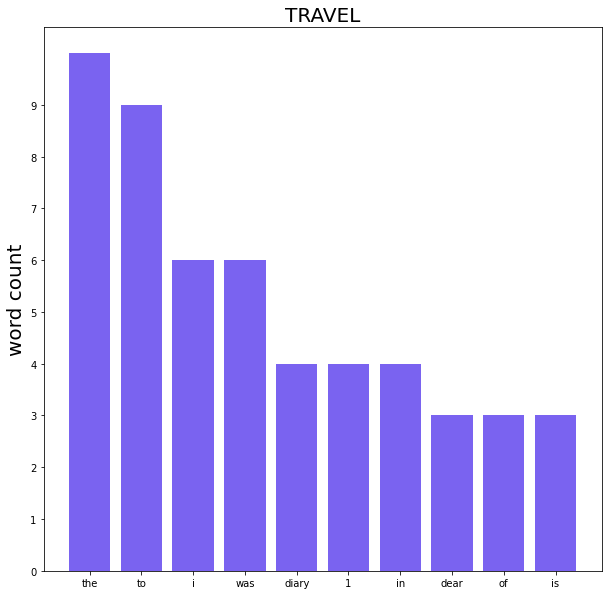

In [165]:
from matplotlib import pyplot as plt

for category,wordcount in count_by_category.items():
  plt.figure(figsize=(10,10))
  frequent=wordcount[:10]
  #print(wordcount)
  word,count = zip(*frequent)
  #print(word,count)
  x_pos = np.arange(len(word)) 
  plt.bar(x_pos,count,align='center',color='#7A63F0')
  plt.xticks(x_pos, word) 
  plt.yticks(list(range(10)))
  plt.ylabel('word count',fontsize=20)
  plt.title(category,fontsize=20)
  plt.savefig('results/'+category+'.png')
  plt.show()

In [0]:
# 카테고리별 빈도 분석
words_list=[]
for _,_,_,content in diary_preprocessed:
  word_list.extend([word for word in content.split(" ") if len(word)>0])

count_total={}
for word in word_list:
  count_total[word] = count_total.get(word, 0) + 1

count_total=sorted(count_total.items(), key = lambda x: x[1], reverse = True)

In [0]:
count_total

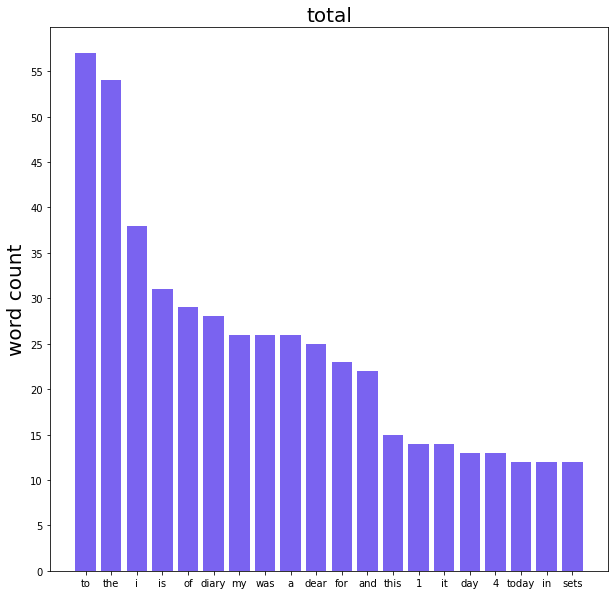

In [164]:
plt.figure(figsize=(10,10))
frequent=count_total[:20]
#print(wordcount)
word,count = zip(*frequent)
#print(word,count)
x_pos = np.arange(len(word)) 
plt.bar(x_pos,count,align='center',color='#7A63F0')
plt.xticks(x_pos, word) 
plt.yticks(list(range(0,60,5)))
plt.ylabel('word count',fontsize=20)
plt.savefig('results/total.png')
plt.title("total",fontsize=20)
plt.show()

In [168]:
!zip -r results.zip results

  adding: results/ (stored 0%)
  adding: results/My birthday party.png (deflated 26%)
  adding: results/total.png (deflated 27%)
  adding: results/STUDY PLANS.png (deflated 27%)
  adding: results/LA Tour.png (deflated 29%)
  adding: results/Final term D-10.png (deflated 27%)
  adding: results/Body profile D-5.png (deflated 25%)
  adding: results/HCI Final presentation.png (deflated 25%)
  adding: results/Trip to China.png (deflated 27%)
  adding: results/Workout routine #02.png (deflated 25%)
  adding: results/TRAVEL.png (deflated 29%)
  adding: results/Trip to Seoul.png (deflated 27%)
  adding: results/Daily blog#01.png (deflated 25%)
  adding: results/Han river jogging.png (deflated 25%)
  adding: results/DALIY DIARY.png (deflated 28%)
  adding: results/WORKOUT.png (deflated 28%)
  adding: results/HCI team meeting.png (deflated 26%)
